In [20]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression    
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Load data  
data = pd.read_excel('college_baseball.xlsx')  

In [21]:
data.head()

,YEAR,Team,AVG,G,AB,R,H,2B,3B,HR,...,R_ALLOWED,ER_ALLOWED,W_ALLOWED,DBL_ALLOWED,TPL_ALLOWED,HR_ALLOWED,WILD_PITCH,BALK,HBP.1,W_INTENTIONAL
0,2015,Alabama,0.275,60,2089,315,575,105,20,27,...,271,247,248,98,10,28,53,4,43,7
1,2015,Arkansas,0.288,65,2164,387,623,107,18,53,...,304,259,282,80,6,35,48,8,70,6
2,2015,Auburn,0.273,62,2029,301,553,109,18,18,...,254,208,212,87,12,33,43,2,37,8
3,2015,Florida,0.298,70,2417,489,720,129,24,66,...,247,220,184,82,14,47,54,3,52,13
4,2015,Georgia,0.267,54,1845,286,493,85,14,40,...,253,211,231,68,11,30,37,8,46,5


In [22]:
#Begin Preprocessing Dataset
# One-Hot Encoding for categorical features  
cat_features = ['Team']  # Add any other categorical features to this list  
data = pd.get_dummies(data, columns=cat_features)  
  
# Define features (X) and target (y)  
X = data.drop('ERA', axis=1)  
y = data['ERA']  
  
# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# Train a machine learning model (Linear Regression)  
model = LinearRegression()  
model.fit(X_train, y_train)  
  
# Make predictions on the test set  
y_pred = model.predict(X_test)  

In [23]:
# Evaluate the performance of the model  
mse = mean_squared_error(y_test, y_pred)  
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.027793916375930153


In [24]:
# Compute R-squared  
r2 = r2_score(y_test, y_pred)  
print(f"R-squared: {r2}")  
  
# Compute Mean Absolute Error  
mae = mean_absolute_error(y_test, y_pred)  
print(f"Mean Absolute Error: {mae}")  

R-squared: 0.9537784683389203
Mean Absolute Error: 0.12789058182041038


#### Understanding the Model's Performance

I have evaluated my Linear Regression model, trained to predict the pitching performance of college baseball teams, using multiple metrics. The model's Mean Squared Error (MSE) is 0.0278, R-squared is 0.9538, and Mean Absolute Error (MAE) is 0.1279. The R-squared value of 0.9538 indicates that approximately 95.38% of the variation in the data can be explained by my model, which is a strong result. Additionally, the MAE of 0.1279 represents the average absolute difference between the actual and predicted values. Considering all three metrics together, I can conclude that my model is performing well in predicting the pitching performance of college baseball teams. However, it's essential to remember that there's always room for improvement, and I could explore other algorithms or feature engineering techniques to optimize the model's performance further.

#### Prediction Analysis and Explaination
In this part of the code, I am making predictions for 2024 using the trained model and finding the team with the best predicted pitching performance.

* y_pred_2024 = model.predict(data_2024): I use the trained model to make predictions on the 2024 data. The variable data_2024 should contain the feature values for each team in 2024, and it must have the same structure as the original dataset used for training.
* best_team_index = np.argmin(y_pred_2024): I find the index of the team with the best predicted pitching performance. Since I assume lower values represent better performance, I use np.argmin to find the index of the minimum value in the y_pred_2024 array.
* best_team = data_2024.iloc[best_team_index]['Team']: I use the index obtained in the previous step to get the corresponding team name from the data_2024 DataFrame.

In [27]:
# I create a DataFrame for 2024 with the same structure as my original data  
original_data = pd.read_excel('college_baseball.xlsx')  
data_2024 = pd.DataFrame({  
    'YEAR': [2024] * len(original_data['Team'].unique()),  
    'Team': original_data['Team'].unique(),  
    # I add other columns and values for 2024  
    # For example, I use the average values of the previous years:  
    'AVG': [original_data['AVG'].mean()] * len(original_data['Team'].unique()),  
    # ... (add other columns as necessary)  
})  
  
# I preprocess 2024 data: One-Hot Encoding for categorical features  
data_2024_encoded = pd.get_dummies(data_2024, columns=cat_features)  
  
# I add missing columns with values set to zero  
missing_cols = set(data.columns) - set(data_2024_encoded.columns)  
for col in missing_cols:  
    data_2024_encoded[col] = 0  
  
# I reorder the columns of data_2024_encoded to match the order of the columns in the original data  
data_2024_encoded = data_2024_encoded[data.columns]  
  
# I make predictions for 2024  
y_pred_2024 = model.predict(data_2024_encoded.drop('ERA', axis=1))  
  
# I find the team with the best predicted performance  
best_team_index = np.argmin(y_pred_2024)  
best_team = data_2024.iloc[best_team_index]['Team']  
print(f"The team with the best predicted pitching performance for 2024 is: {best_team}")  


The team with the best predicted pitching performance for 2024 is: Auburn


#### Visualizing the Data and Results

* In the first graph, I have visualized the distribution of actual ERA values in the test dataset. This histogram shows the frequency of different ERA values, helping me understand the overall distribution of the pitching performance in the test set.

* The second graph presents the distribution of predicted ERA values generated by the model. Comparing this histogram to the first one, I can see how well the model's predictions match the actual data's distribution. Ideally, the shapes of these two histograms should be similar to indicate the model's ability to capture the underlying distribution of the data.

* The third graph is a scatter plot of actual vs. predicted ERA values. This plot helps me visualize the relationship between the true and predicted values. If the model's predictions are accurate, the points should lie close to a diagonal line. This plot is useful for identifying outliers or any trends in the model's predictions.

* In the fourth graph, I have created a residual plot of the actual vs. predicted ERA values. The residuals are the differences between the actual and predicted values. This plot shows the distribution of residuals across different ERA values and helps me identify any patterns or issues in the model's predictions. Ideally, the residuals should be randomly distributed around the zero line, indicating that the model's errors are random and not influenced by specific trends or patterns in the data.


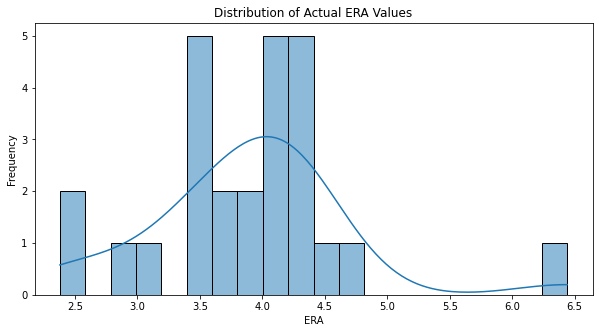

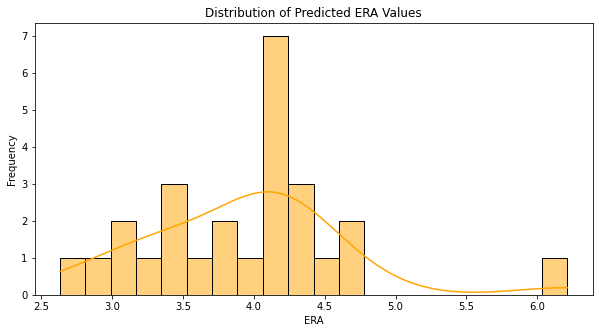

In [28]:
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Distribution of Actual ERA values  
plt.figure(figsize=(10, 5))  
sns.histplot(y_test, kde=True, bins=20)  
plt.title('Distribution of Actual ERA Values')  
plt.xlabel('ERA')  
plt.ylabel('Frequency')  
plt.show()  
  
# Distribution of Predicted ERA values  
plt.figure(figsize=(10, 5))  
sns.histplot(y_pred, kde=True, bins=20, color='orange')  
plt.title('Distribution of Predicted ERA Values')  
plt.xlabel('ERA')  
plt.ylabel('Frequency')  
plt.show()  

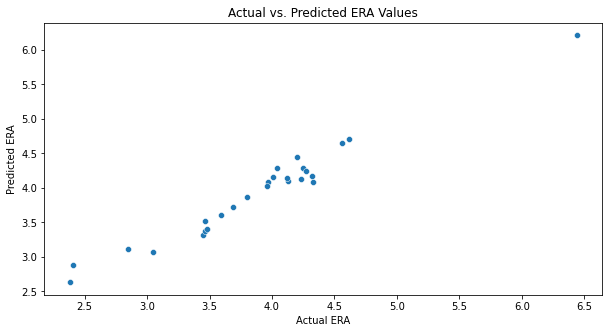

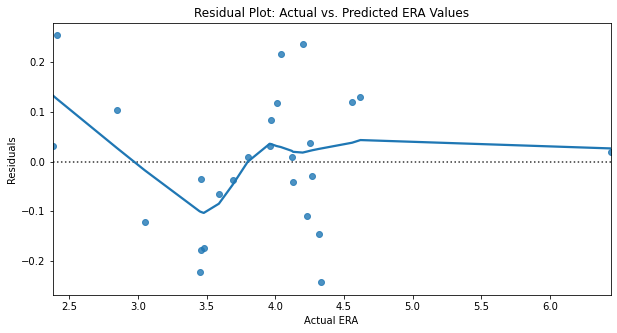

In [29]:
# Scatter plot of Actual vs. Predicted ERA values  
plt.figure(figsize=(10, 5))  
sns.scatterplot(x=y_test, y=y_pred)  
plt.title('Actual vs. Predicted ERA Values')  
plt.xlabel('Actual ERA')  
plt.ylabel('Predicted ERA')  
plt.show()  
  
# Residual plot of Actual vs. Predicted ERA values  
plt.figure(figsize=(10, 5))  
sns.residplot(x=y_test, y=y_pred, lowess=True)  
plt.title('Residual Plot: Actual vs. Predicted ERA Values')  
plt.xlabel('Actual ERA')  
plt.ylabel('Residuals')  
plt.show()  